# Setup Libs and Loading Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
od.download(
    "https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure")  #{"username":"alexism24","key":"f994f56109dae21a3551f0b04208a53f"}
file =('/content/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv')
df = pd.read_csv(file)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexism24
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure


100%|██████████| 3.97k/3.97k [00:00<00:00, 1.42MB/s]

# EDA

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.size

3887

In [6]:
df.shape

(299, 13)

In [7]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
262,65.000,1,258,1,25,0,198000.00,1.40,129,1,0,235,1
109,45.000,0,292,1,35,0,850000.00,1.30,142,1,1,88,0
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71,0
164,45.000,0,2442,1,30,0,334000.00,1.10,139,1,0,129,1
69,65.000,0,113,1,25,0,497000.00,1.83,135,1,0,67,1
244,54.000,0,582,1,38,0,264000.00,1.80,134,1,0,213,0
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172,0
154,65.000,1,335,0,35,1,235000.00,0.80,136,0,0,120,0
45,50.000,0,582,1,38,0,310000.00,1.90,135,1,1,35,1
92,42.000,0,582,0,60,0,263358.03,1.18,137,0,0,82,0


## Determine binary variables and numerical variable

In [8]:
binary_var = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
numerical_var =  df[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','age']]
target_var = df[['DEATH_EVENT']]

In [9]:
print(type(numerical_var))

<class 'pandas.core.frame.DataFrame'>


## Univariate Analysis

1. Numerical Variable Univariate Analysis

In [10]:
# Descriptive Statistics for numerical variables
numerical_var.describe().round(2)

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,age
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,581.84,38.08,263358.03,1.39,136.63,130.26,60.83
std,970.29,11.83,97804.24,1.03,4.41,77.61,11.89
min,23.00,14.00,25100.00,0.50,113.00,4.00,40.00
25%,116.50,30.00,212500.00,0.90,134.00,73.00,51.00
50%,250.00,38.00,262000.00,1.10,137.00,115.00,60.00
75%,582.00,45.00,303500.00,1.40,140.00,203.00,70.00
max,7861.00,80.00,850000.00,9.40,148.00,285.00,95.00


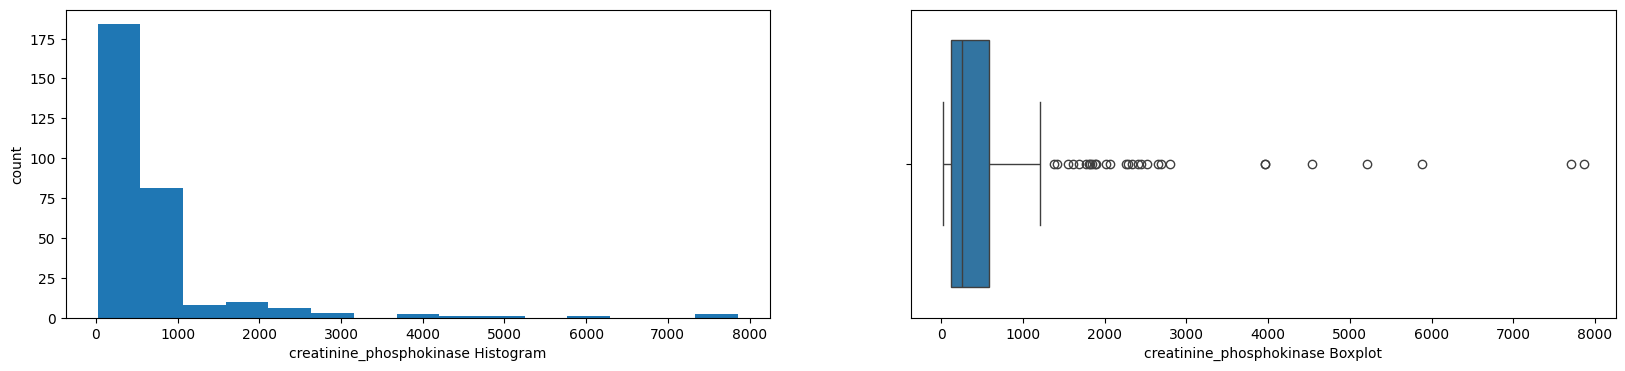

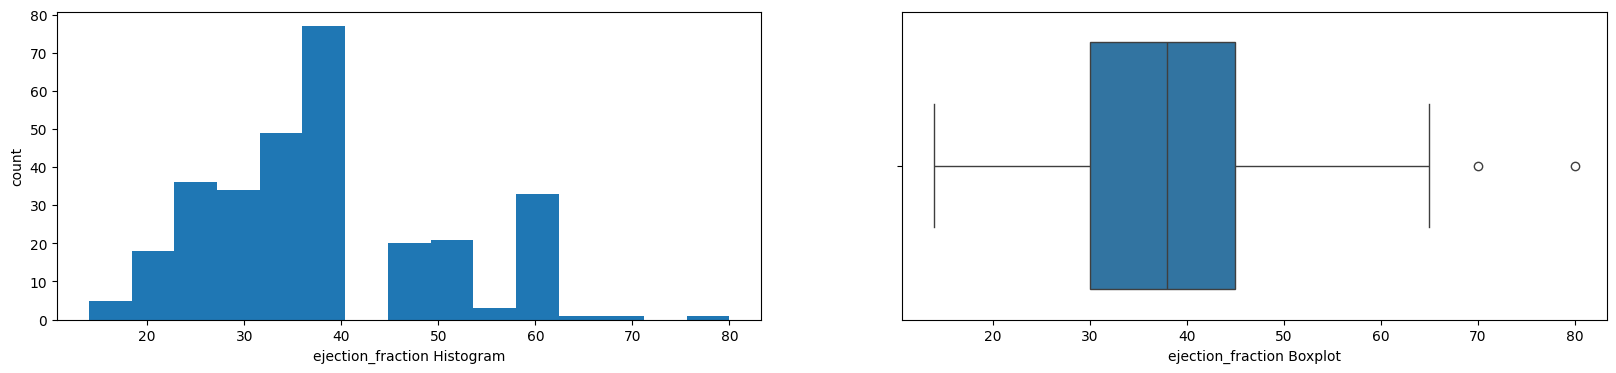

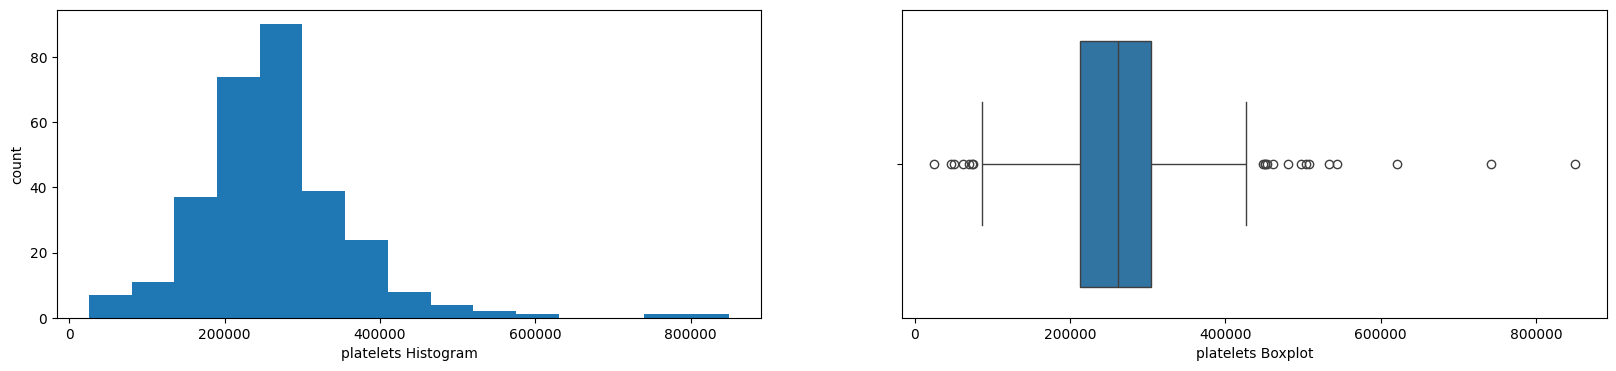

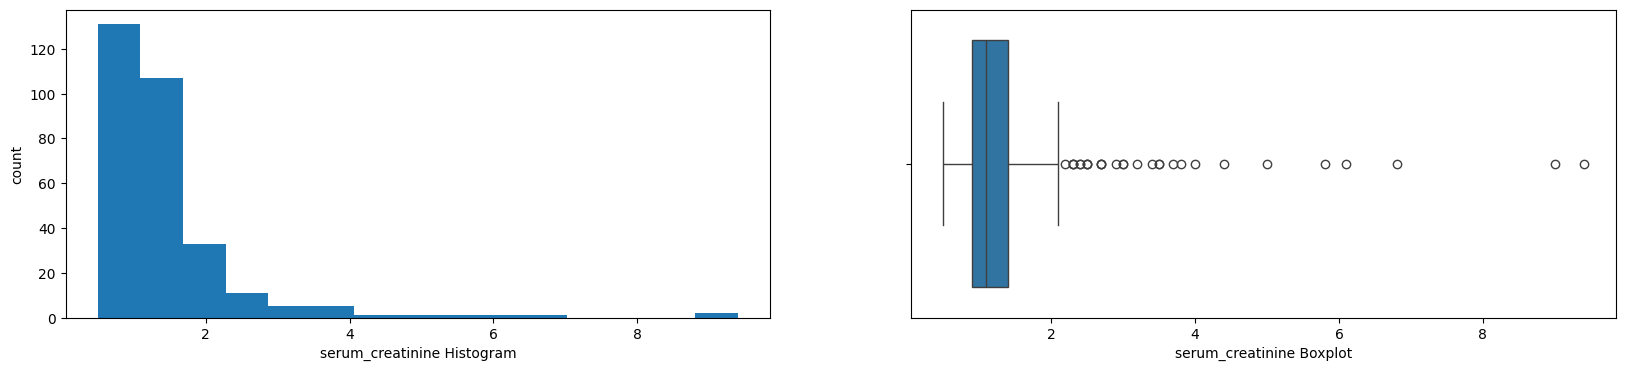

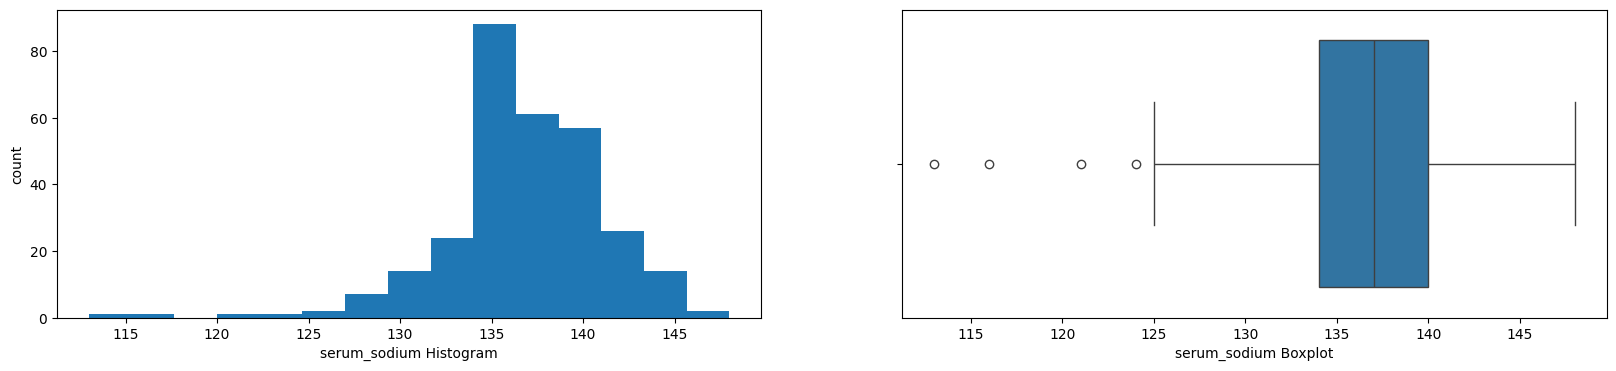

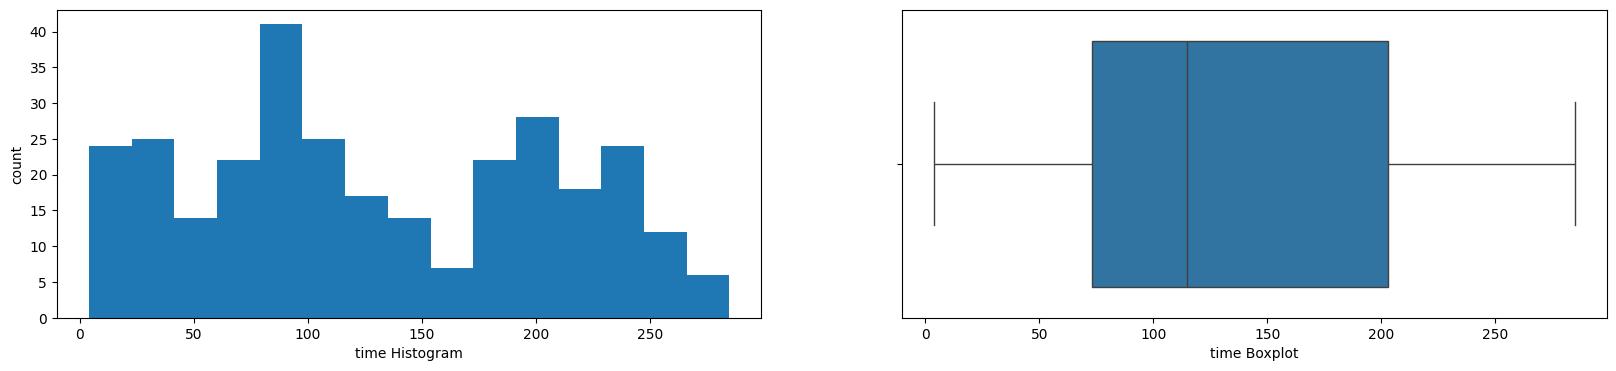

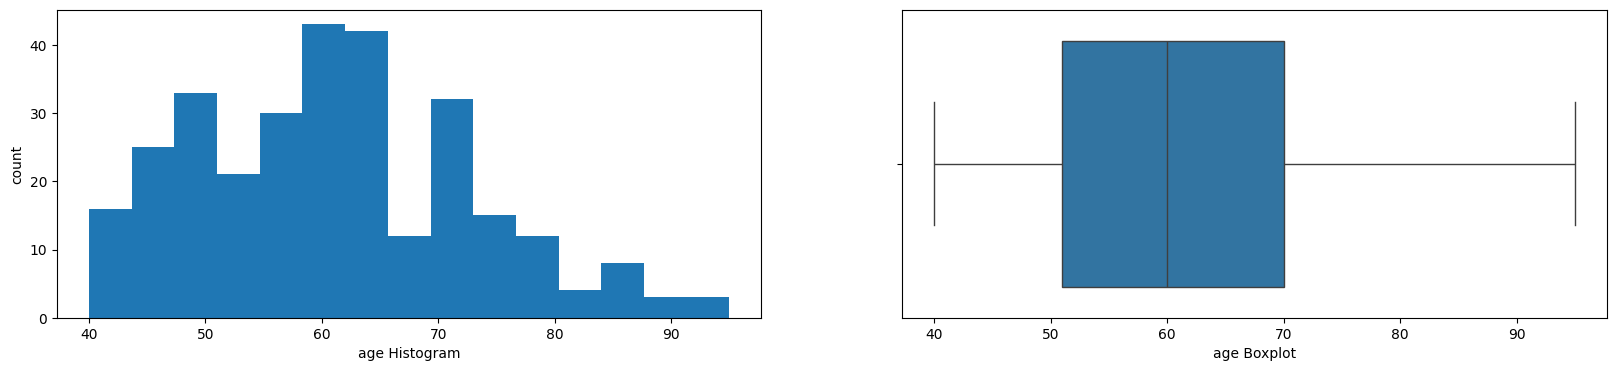

In [11]:
# Plotting distribution charts for numerical variables
for i in numerical_var:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    numerical_var[i].hist(bins=15, grid=False)
    plt.ylabel('count')
    plt.xlabel(str(i) + ' Histogram')
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical_var[i])
    plt.xlabel(str(i) + ' Boxplot')

2. Binary Variables Univariate Analysis

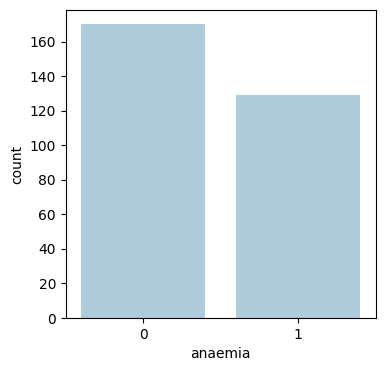

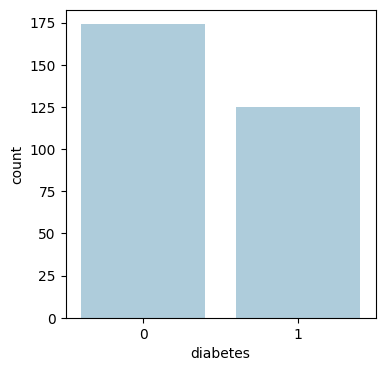

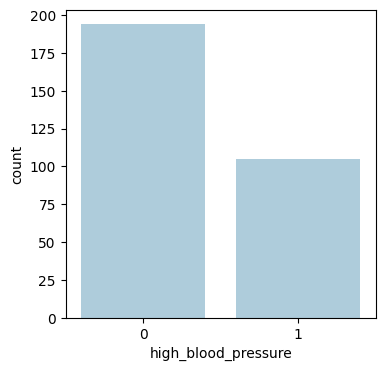

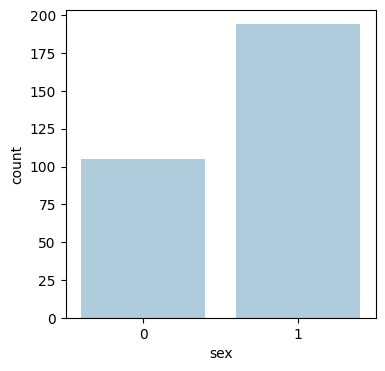

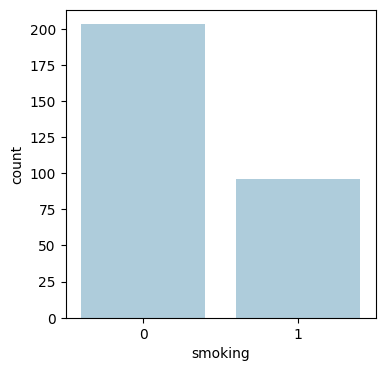

In [12]:
# independent categorical variables countplots
for i in binary_var:
    plt.figure(figsize=(4,4))
    sns.set_palette("Paired")
    sns.countplot(x = i, data = binary_var)
    plt.ylabel('count')

3. Target Variable Univariate Analysis

In [13]:
df['DEATH_EVENT'].unique()

array([1, 0])

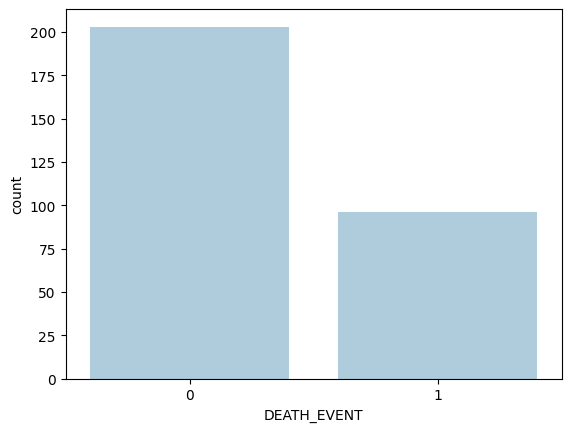

In [14]:
ax = sns.countplot(x ='DEATH_EVENT', data = target_var) # check the distribution of the output variable

## Bivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


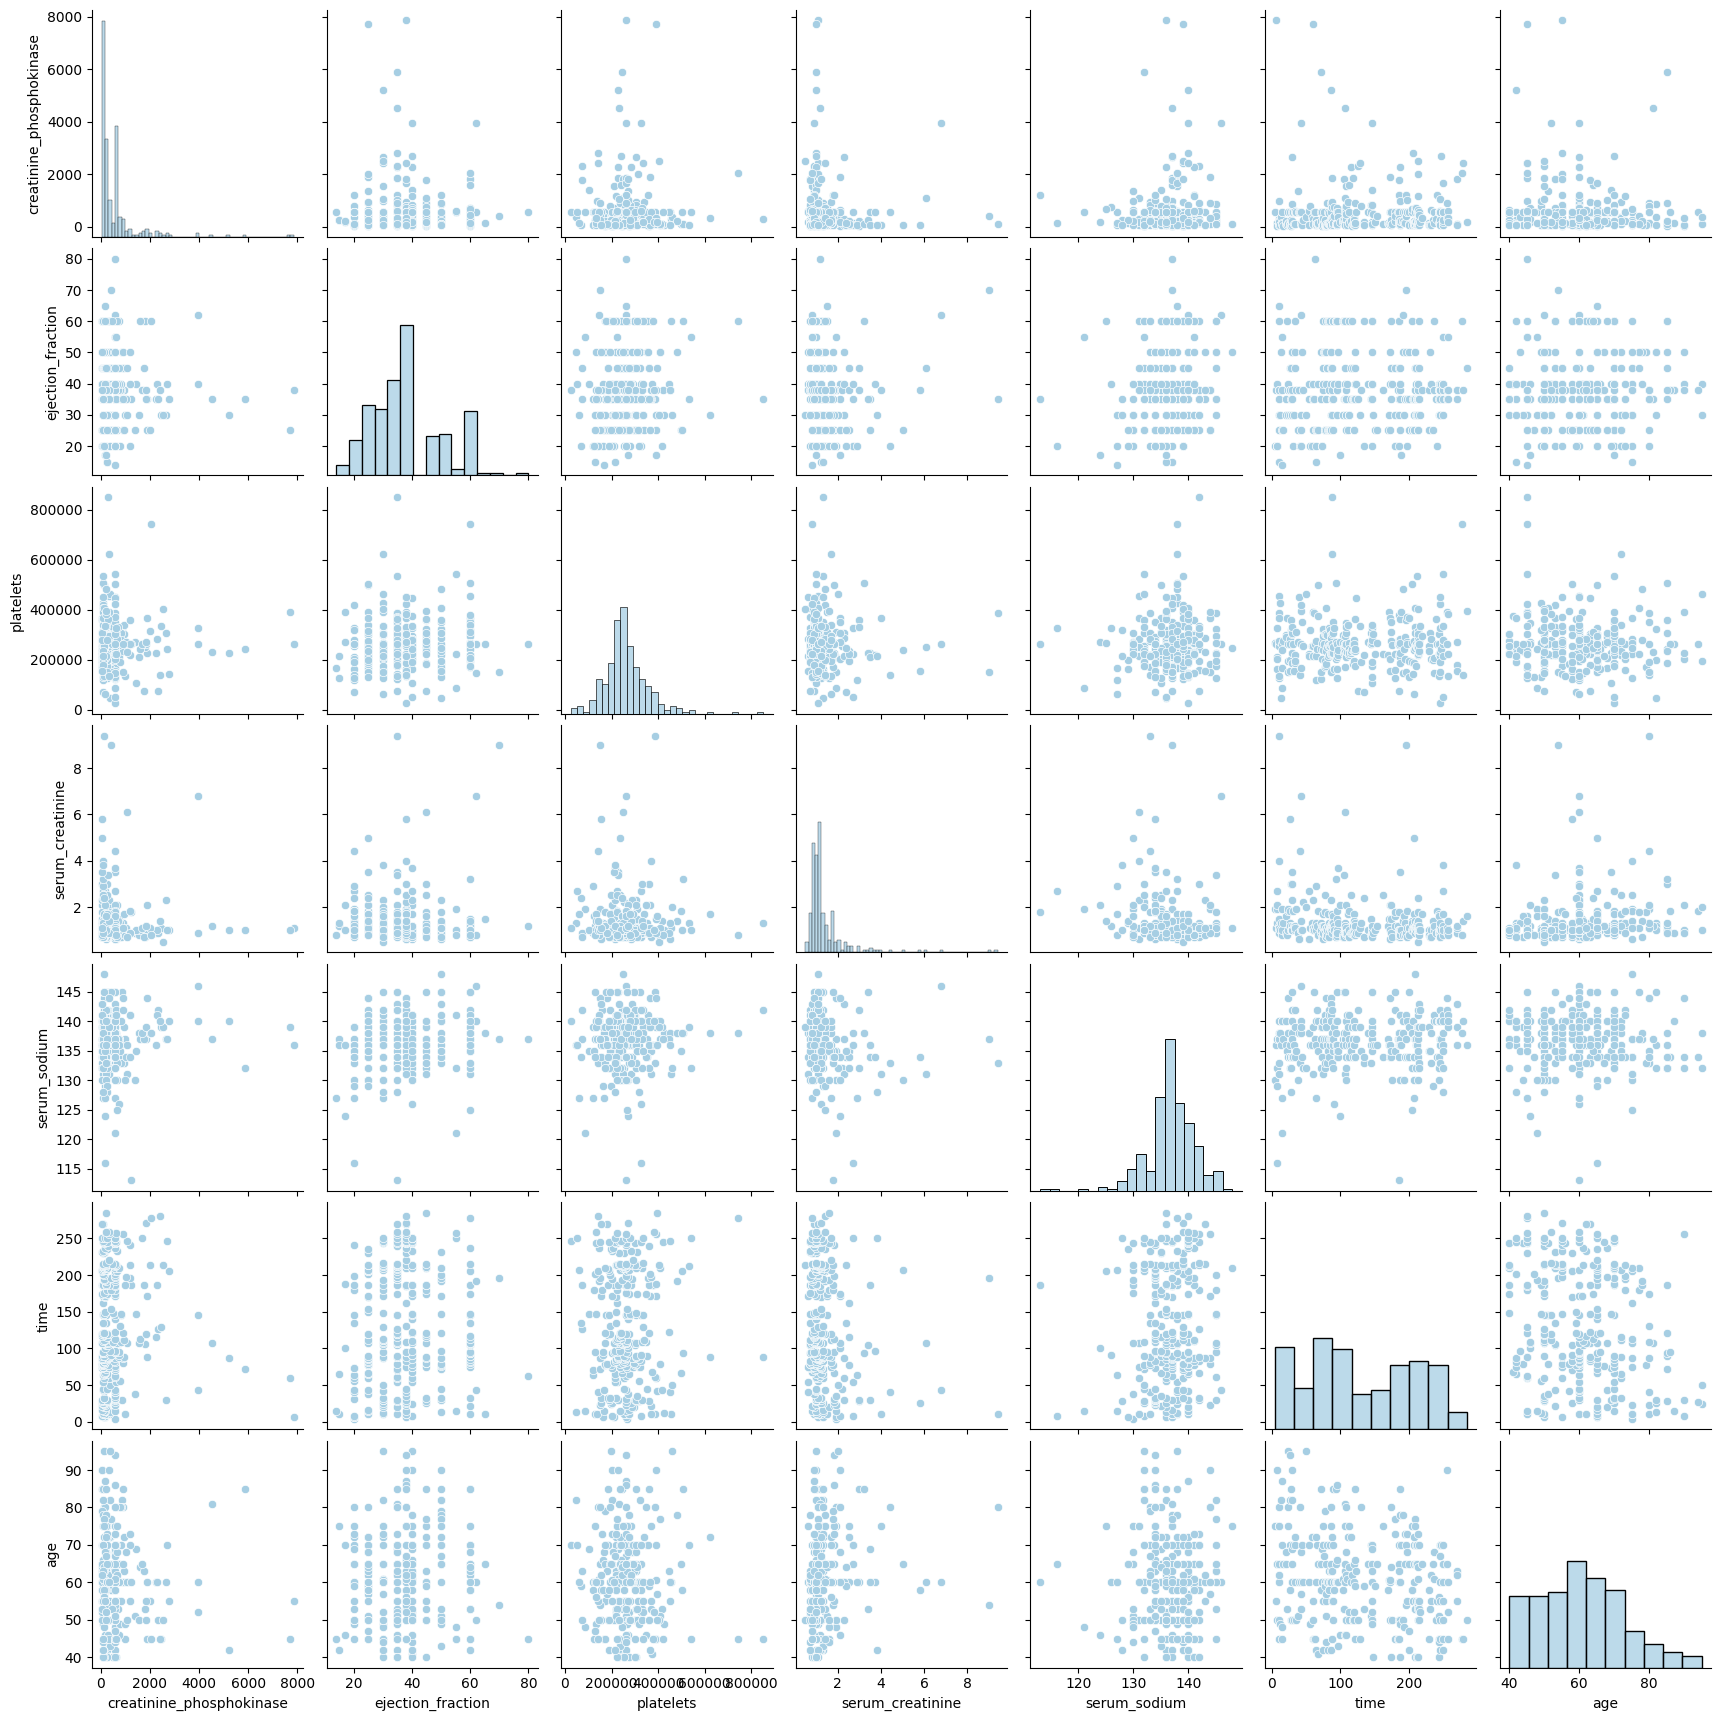

In [15]:
# scatterplot to see the distributions of the variables and
# how they are correlated to ther variables

ax = sns.pairplot(numerical_var, size = 2.5) # scatter plots

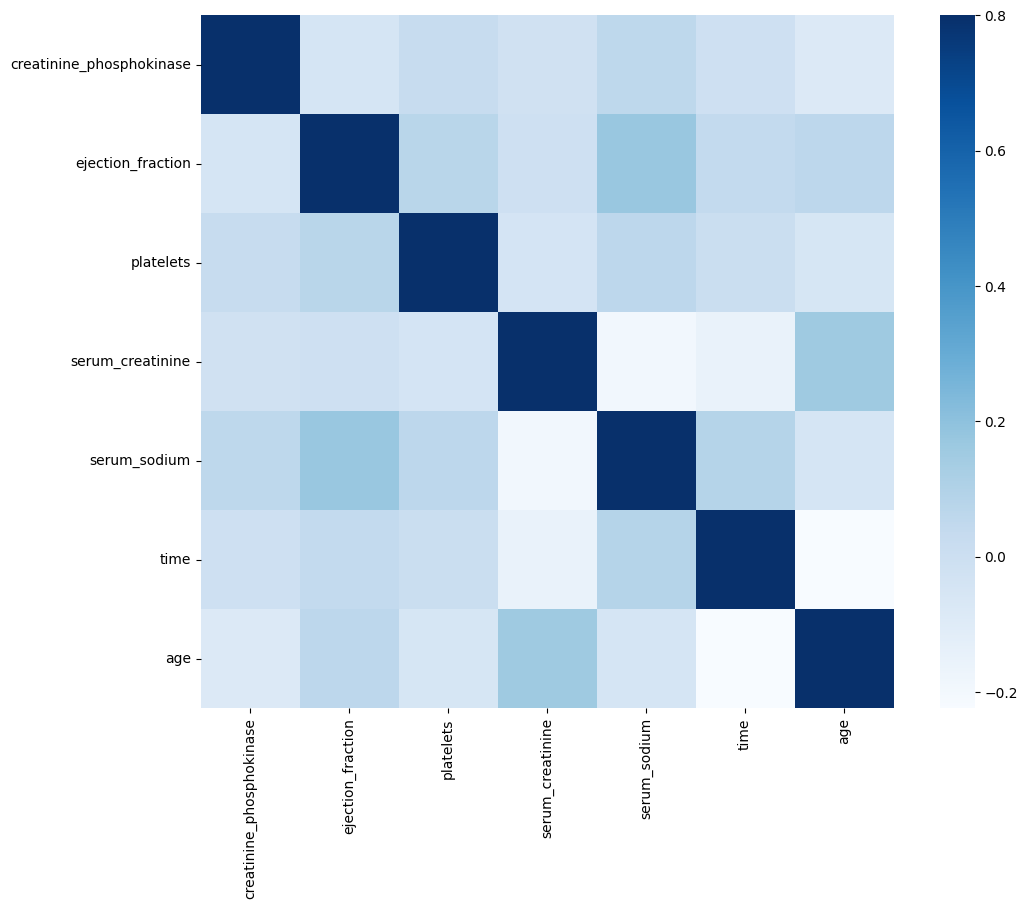

In [16]:
# computes the person correlation among variables
corrmat = numerical_var.corr()

# plots a correlation plot
f, ax = plt.subplots(figsize=(12, 9)) # determines the figure size
ax = sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues") # creates a heatmap using the correlation matrix

## Fixing outsample in target variable

In [17]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
77,42.0,0,102,1,40,0,237000.00,1.2,140,1,0,74,0
20,65.0,1,52,0,25,1,276000.00,1.3,137,0,0,16,0
131,60.0,1,1082,1,45,0,250000.00,6.1,131,1,0,107,0
85,51.0,0,78,0,50,0,406000.00,0.7,140,1,0,79,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
109,45.0,0,292,1,35,0,850000.00,1.3,142,1,1,88,0
140,80.0,0,805,0,38,0,263358.03,1.1,134,1,0,109,1
13,50.0,1,168,0,38,1,276000.00,1.1,137,1,0,11,1
213,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1
263,68.0,1,157,1,60,0,208000.00,1.0,140,0,0,237,0


In [18]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) # using the smote technique
# (somehow oversampling) to balance the data

input_var = list(set(df.columns) - set(['DEATH_EVENT'])) # sets the input var

X, Y = os.fit_resample(df[df.columns.difference(['DEATH_EVENT'])], df['DEATH_EVENT']) # oversamples the data
X = pd.DataFrame(X, columns = input_var) # makes the X array as a dataframe
Y = pd.DataFrame(Y, columns = ['DEATH_EVENT']) # makes the Y array as a dataframe

df = pd.concat([X, Y], axis=1) # Combine X and Y

In [19]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
1    203
0    203
Name: count, dtype: int64

## Standardize the data

In [20]:
# your code to standardize numerical variables goes in here
# import Standard Scaler
from sklearn.preprocessing import StandardScaler

# re-identify numerical variables
numeric_var = list(set(df.dtypes[df.dtypes != object].index))

# set standardization instance
df_scaler = StandardScaler().fit(df[numeric_var])

# standardize and replace value in the original dfframe
df[numeric_var] = pd.DataFrame(df_scaler.transform(df[numeric_var]),columns = numeric_var)

df.sample(10)

,serum_creatinine,serum_sodium,smoking,time,platelets,ejection_fraction,creatinine_phosphokinase,sex,high_blood_pressure,anaemia,age,diabetes,DEATH_EVENT
387,-0.700032,-1.431343,-0.586831,-0.246990,-1.015040,-0.324700,0.015850,-1.148913,-0.651584,-0.781736,-1.217767,-0.737378,1.0
352,-0.337674,0.182894,-0.586831,-1.415947,-1.282169,-1.013546,0.193875,0.870388,-0.651584,1.279204,-0.617169,-0.737378,1.0
38,0.625540,0.182894,-0.586831,-1.150275,0.490690,-0.583017,2.281022,0.870388,-0.651584,-0.781736,-0.147890,1.356157,-1.0
27,-0.199126,-0.047711,1.704068,-1.203409,0.274085,0.708570,-0.486551,0.870388,1.534722,-0.781736,0.720877,1.356157,1.0
267,0.130741,0.874710,-0.586831,1.692416,-1.283411,0.105830,-0.472353,0.870388,-0.651584,1.279204,-0.495397,1.356157,-1.0
6,-0.281592,0.182894,-0.586831,-1.415947,-1.345299,-1.874604,-0.351121,0.870388,-0.651584,1.279204,1.155261,-0.737378,1.0
390,0.388414,-0.508922,-0.586831,-0.326692,-2.016808,-0.583017,-0.427573,0.870388,-0.651584,-0.781736,0.469210,-0.737378,1.0
354,-0.286894,-0.739527,-0.586831,-0.592364,0.089528,-1.444075,0.034417,0.870388,-0.651584,-0.781736,0.600490,-0.737378,1.0
401,6.250533,-0.739527,-0.586831,-1.402663,1.349196,-0.238594,-0.485459,-1.148913,-0.651584,1.279204,1.523260,-0.737378,1.0
140,-0.364059,-0.508922,-0.586831,-0.100870,0.061172,0.105830,0.259405,0.870388,-0.651584,-0.781736,1.589644,-0.737378,1.0


# Fitting the Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
X = df.drop('DEATH_EVENT', axis = 1)
Y = df['DEATH_EVENT']

In [23]:
#Splitting the data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [25]:
lr.coef_.round(5)

array([[ 0.87748, -0.30917, -0.20324, -1.65256, -0.10147, -1.12852,
         0.27279, -0.54541, -0.24163, -0.17021,  0.68797, -0.24653]])

In [26]:
lr.intercept_.round(5)

array([-0.04401])

Visualize the logistic curve

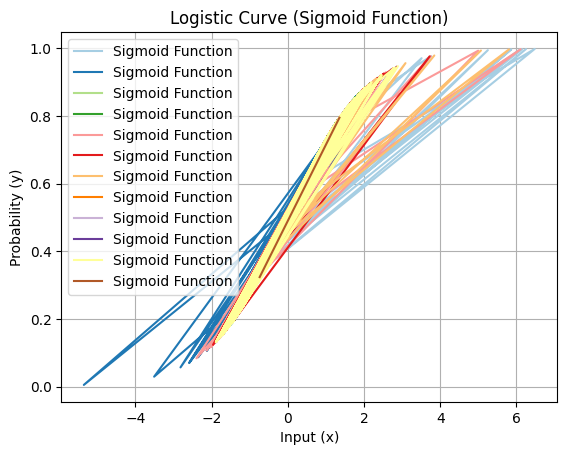

In [27]:
def sigmoid(x):
  """Sigmoid function (logistic function)"""
  return 1 / (1 + np.exp(-x))

# Create x-axis values for a smooth curve
x = np.array(X_train)  # Adjust range for desired visualization

# Calculate y-axis values (probabilities) using sigmoid function
y = sigmoid(x)

# Plot the sigmoid curve
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('Input (x)')
plt.ylabel('Probability (y)')
plt.title('Logistic Curve (Sigmoid Function)')
plt.grid(True)
plt.legend()
plt.show()

## Model Assessment

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [30]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

In [31]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

In [32]:
print(accuracy_lr.round(5))
print(sensitivity_lr.round(5))
print(specificity_lr.round(5))

0.86585
0.8
0.91489


In [33]:
cm = confusion_matrix(Y_test, pred_Y_lr, labels = lr.classes_)

In [34]:
import sklearn.metrics as metrics
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)

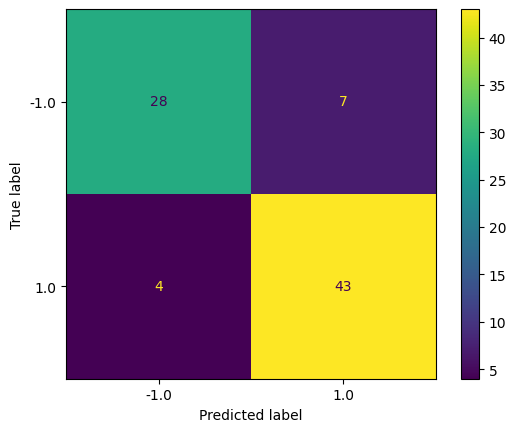

In [35]:
disp.plot()

Precisionn measures the proportion of data points predicted as True that are actually True

Precision = TP/(TP+FP)

In [36]:
metrics.precision_score(Y_test, pred_Y_lr).round(5)

0.86

86% case predicted to be dead, are actually dead

Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True

In [37]:
metrics.recall_score(Y_test, pred_Y_lr).round(5)

0.91489

91% of the cases are correctly detected to be dead

Accuracy measure the proportion of data points that are correctly classified

In [38]:
metrics.accuracy_score(Y_test, pred_Y_lr).round(5)

0.86585

86% of the cases are correctly predicted, with the predictions being either will be dead of will not be **dead**

## ROC Curve

In [39]:
from sklearn.metrics import roc_curve, auc

- ROC Curve helps visualize the performance of a logistic regression. In the context of binary classification, a classification threshold is a cutoff for differentiating the positive class from the negative class.
- The more that the ROC Curve hugs the top left corner of the plot, the better the model dose at classifying data

- AUC provides an aggerate measure of performance across all possible classification thresholds

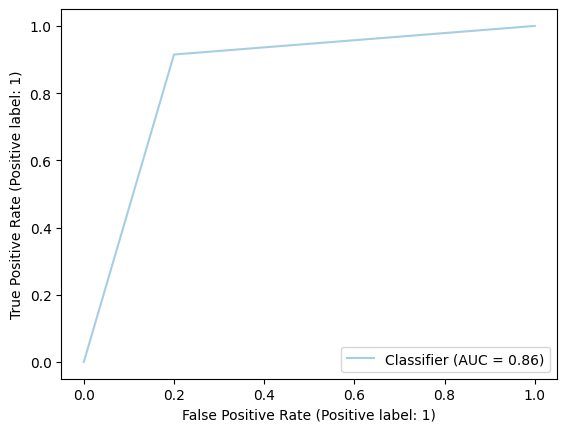

In [40]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(Y_test, pred_Y_lr)
plt.show()

In [41]:
metrics.roc_auc_score(Y_test, pred_Y_lr)

0.8574468085106383

AUC = 86% means that 78% of the classifier's predictions are correct across all classification thresholds